In [2]:
!pip install roboflow --quiet

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="O5iO9K7lEJDdMFfmdsvs")
project = rf.workspace("yolo-food-seg").project("uecfood_256")
version = project.version(1)
dataset = version.download("yolov8-obb")

loading Roboflow workspace...
loading Roboflow project...


In [5]:
!pip install ultralytics --quiet

In [6]:
from ultralytics import YOLO

In [7]:
# Load a YOLOv8 model from a pre-trained weights file
model = YOLO("yolov8n-seg.pt")

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [12]:
results = model.train(data="./datasets/uecfood_256-1/data.yaml", epochs=100, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.101 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.4.1 CPU (Apple M1)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=./datasets/uecfood_256-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnosti

In [22]:
model = YOLO("runs/segment/train13/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps  # a list contains map50-95(M) of each category

Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.4.1 CPU (Apple M1)
YOLOv8n-seg summary (fused): 195 layers, 3259039 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /Users/evakhromeeva/Projects/BeYOLOSegmentation/datasets/uecfood_256-1/valid/labels.cache... 63 images, 0 backgrounds, 8 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]
val: WARNING ⚠️ /Users/evakhromeeva/Projects/BeYOLOSegmentation/datasets/uecfood_256-1/valid/images/10621_jpg.rf.a6748e569eefd935ddf2f649765e3f5c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0169      1.0178]
val: WARNING ⚠️ /Users/evakhromeeva/Projects/BeYOLOSegmentation/datasets/uecfood_256-1/valid/images/10645_jpg.rf.4f14c3027f1a5307b941a3dbc986a13f.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0892      1.1136]
val: WARNING ⚠️ /Users/evakhromeeva/Projects/BeYOLOSegmentation/datasets/uecfood_256-1/valid/images/3004_jpg.rf.7e165c8eb6c43b1852892c141f3cd449.jpg: ignoring 

array([    0.29868,    0.085206,     0.50337,     0.11774,     0.10302])

In [34]:
!yolo task=segment mode=predict model=runs/segment/train13/weights/best.pt conf=0.25 source='datasets/uecfood_256-1/valid/images/3004_jpg.rf.7e165c8eb6c43b1852892c141f3cd449.jpg' save=True

/opt/anaconda3/envs/yolov8_segmentation/lib/python3.10/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_l

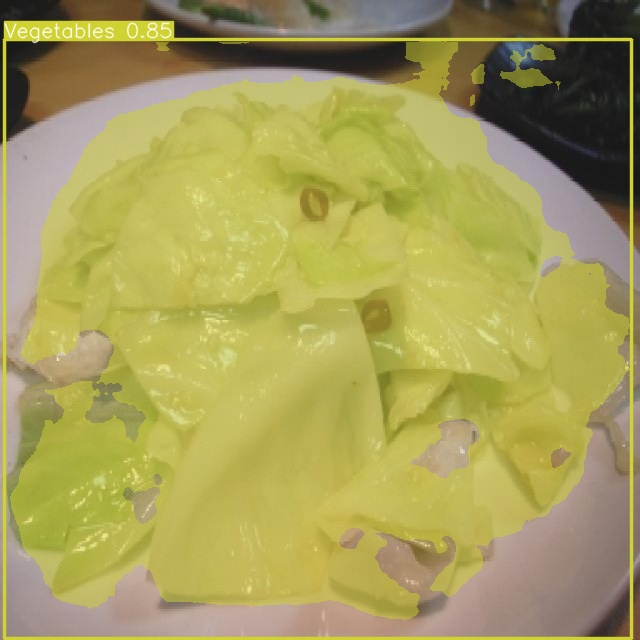

In [35]:
from IPython.display import display, Image
Image(filename='runs/segment/predict15/3004_jpg.rf.7e165c8eb6c43b1852892c141f3cd449.jpg', height=600)

In [28]:
# datasets/yolo-food/images/val/951896_IMG_0925.jpg 
!yolo task=segment mode=predict model=runs/segment/train13/weights/best.pt conf=0.25 source='datasets/yolo-food/images/val/951896_IMG_0926.jpg' save=True

/opt/anaconda3/envs/yolov8_segmentation/lib/python3.10/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_l

In [21]:
print(results)

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x31b45ebf0>
fitness: 0.5185824679634748
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)']
maps: array([    0.75722,     0.17041,     0.97828,     0.27134,     0.24374])
names: {0: 'Dairy', 1: 'Fruits', 2: 'Grains', 3: 'Protein', 4: 'Vegetables'}
plot: True
results_dict: {'metrics/precision(B)': 0.5297623309185896, 'metrics/recall(B)': 0.41749119574614707, 'metrics/mAP50(B)': 0.4210731354532882, 'metrics/mAP50-95(B)': 0.26259619579575666, 'metrics/precision(M)': 0.5143385837151584, 'metrics/recall(M)': 0.40848023683256773, 'metrics/mAP50(M)': 0.4069591563350546, 'metrics/mAP50-95(M)': 0.22160295840939942, 'fitness': 0.5185824679634748}
sa

In [43]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("runs/segment/train13/weights/best.pt")

# Export the model to ONNX format
model.export(format="onnx")  # creates 'yolov8n.onnx'

# Load the exported ONNX model
onnx_model = YOLO("runs/segment/train13/weights/best.pt")

# Run inference
results = onnx_model("test_meal_img.jpeg")

Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.4.1 CPU (Apple M1)
YOLOv8n-seg summary (fused): 195 layers, 3259039 parameters, 0 gradients, 12.0 GFLOPs

PyTorch: starting from 'runs/segment/train13/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 41, 8400), (1, 32, 160, 160)) (6.5 MB)

ONNX: starting export with onnx 1.16.2 opset 19...
ONNX: export success ✅ 0.4s, saved as 'runs/segment/train13/weights/best.onnx' (12.6 MB)

Export complete (0.7s)
Results saved to /Users/evakhromeeva/Projects/BeYOLOSegmentation/runs/segment/train13/weights
Predict:         yolo predict task=segment model=runs/segment/train13/weights/best.onnx imgsz=640  
Validate:        yolo val task=segment model=runs/segment/train13/weights/best.onnx imgsz=640 data=./datasets/uecfood_256-1/data.yaml  
Visualize:       https://netron.app

image 1/1 /Users/evakhromeeva/Projects/BeYOLOSegmentation/test_meal_img.jpeg: 448x640 2 Vegetabless, 74.0ms
Speed: 1.6ms preprocess, 74.0ms inferen

In [44]:
metrics = model.val()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.4.1 CPU (Apple M1)
YOLOv8n-seg summary (fused): 195 layers, 3259039 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /Users/evakhromeeva/Projects/BeYOLOSegmentation/datasets/uecfood_256-1/valid/labels.cache... 63 images, 0 backgrounds, 8 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]
val: WARNING ⚠️ /Users/evakhromeeva/Projects/BeYOLOSegmentation/datasets/uecfood_256-1/valid/images/10621_jpg.rf.a6748e569eefd935ddf2f649765e3f5c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0169      1.0178]
val: WARNING ⚠️ /Users/evakhromeeva/Projects/BeYOLOSegmentation/datasets/uecfood_256-1/valid/images/10645_jpg.rf.4f14c3027f1a5307b941a3dbc986a13f.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0892      1.1136]
val: WARNING ⚠️ /Users/evakhromeeva/Projects/BeYOLOSegmentation/datasets/uecfood_256-1/valid/images/3004_jpg.rf.7e165c8eb6c43b1852892c141f3cd449.jpg: ignoring 

In [45]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'Dairy', 1: 'Fruits', 2: 'Grains', 3: 'Protein', 4: 'Vegetables'}
orig_img: array([[[211, 212, 210],
        [208, 209, 207],
        [219, 220, 218],
        ...,
        [235, 232, 228],
        [231, 228, 224],
        [231, 228, 224]],

       [[218, 219, 217],
        [218, 219, 217],
        [216, 217, 215],
        ...,
        [229, 226, 222],
        [232, 229, 225],
        [232, 229, 225]],

       [[222, 223, 221],
        [223, 224, 222],
        [213, 214, 212],
        ...,
        [224, 221, 217],
        [230, 227, 223],
        [230, 227, 223]],

       ...,

       [[170, 166, 165],
        [168, 164, 163],
        [167, 163, 162],
        ...,
        [228, 224, 219],
        [226, 222, 217],
        [226, 222, 217]],

       [[172, 168, 167],
        [171, 167, 166],
        [171, 167, 

In [58]:
import torch

def count_result(result):
    classes_names = result.names
    classes = result.boxes.cls.cpu().numpy()
    masks = result.masks.data.cpu().numpy()

    semSegResult = {
        "total": 0
    }

    for i in classes_names:
        semSegResult[classes_names[i]] = 0

    for i in enumerate(result.masks.data):
          maskClass = classes_names[int(classes[i[0]])]
          maskSum = int(torch.sum(result.masks.data[i[0]]))
          semSegResult["total"] = semSegResult["total"] + maskSum
          if maskClass not in  semSegResult:
               semSegResult[maskClass] = maskSum
          else:
               semSegResult[maskClass] = semSegResult[maskClass] + maskSum
     
    return semSegResult


In [62]:
model_res = count_result(results[0])
print('Last predict:')
print(f'Dairy: {model_res["Dairy"]/model_res["total"]*100}')
print(f'Fruits: {model_res["Fruits"]/model_res["total"]*100}')
print(f'Grains: {model_res["Grains"]/model_res["total"]*100}')
print(f'Protein: {model_res["Protein"]/model_res["total"]*100}')
print(f'Vegetables: {model_res["Vegetables"]/model_res["total"]*100}')

Last predict:
Dairy: 0.0
Fruits: 0.0
Grains: 0.0
Protein: 0.0
Vegetables: 100.0
